# INFO 2950 Homework 3

So far, we've been looking within one variable at a time: population, avocado price, etc. In this homework, we're going to start looking at ways of quantifying the relationship *between* two variables.

**No problem in this homework will involve `for` loops. Use only methods that operate on pandas DataFrames or Series.** (Series are one-dimensional arrays and often how DataFrame columns are represented when extracted.) These custom methods are written to operate efficiently on pandas objects, and are generally more computationally efficient than `for` loops.

## Part 1: Discussion exercises

### Python Functions

A Python function is a set of pre-defined code which is programmed for a certain purpose. To decrease code repetition (especially copy and pasting, which can introduce unwanted bugs), we write functions to perform repeated tasks. You can input data and other arguments (usually called "parameters") into a function. A function will perform its internal code and can (optionally) output objects using a `return` statement. A function will only execute when it's explicitly called. Indents in the function definiton are essential.

Here is an example of a simple function that prints the variable passed in the first (and only) parameter (called `print_content` locally, within the function definition).

In [1]:
def print_sth(print_content):
    '''
    param print_content: a string parameter. This is what you want to print
    '''
    print(print_content)
    
print_sth("Homework 3")    

Homework 3


While this function prints a statement, it doesn't actually return anything:

In [2]:
print("type returned: " + str(type(print_sth("test"))))

test
type returned: <class 'NoneType'>


The comment (between the `'''` symbols) in the function defintion tells the user what the parameter `print_content` should be. This syntax can automatically generate documentation for your own functions. It is very important to document any code you bother spending time to convert to a function, because you may want to use it again or share your code with others. It's helpful to write notes about how the function can be used and what it does.

Here is another function: this one takes *two* arguments and actually returns an object, all of which is documented in the comment at the top of the function definition. 

In [3]:
def course(dept,classcode):
    '''
    param dept: a string. It's the department code. 
    param classcode: an integer. It's the course number
    return: a string value which combines both department code and course number
    '''
    return dept+str(classcode)

output = course("INFO",2950)
print(output)
print("type returned: " + str(type(output)))

INFO2950
type returned: <class 'str'>


### String formatting

We often want to construct and print strings that include the values of calculated variables; it's good practice to add context to any values you print in your notebooks, so others reading them know what the number you're printing is. For instance, it's clearer to print `mean price: $27.80` instead of just `27.8`.
    
You can concatenate strings with the `+` operator, but you can't merge a string and a number without doing some type conversion (like we did above with `str(type(output))`). Sometimes there are multiple ways to display a variable, such as a float with either 2 or 3 decimal places. All strings have a function `.format()` that allows you to construct strings with placeholders where variables get inserted and to specify how the variables should appear.

We start by creating a string *template* (as a string). We insert placeholders `{}` into the string template where we want variable values to appear. Then for each of these placeholds, we include corresponding variable as an argument to `.format()` (in the desired order of appearance in the string template). For each of these values, Python will convert the value to a string and insert it in the corresponding placeholder. You can also specify how you want a value to appear. To format a value as a 4-digit decimal integer with leading zeros, use `{:04d}`. To round a float to two decimal places, use `{:.2f}`. See [the documentation](https://docs.python.org/3.8/library/string.html#formatspec) for other options.

Python also supports an older string format style using the `%` operator, which we prefer you do *not* use. There is also a newer method called f-strings that you may use. You may be familiar with `.format()` in the context of `print()` statements, but it's really a function of strings, not printing strings.

In [4]:
"this is my {} string".format("favorite")

'this is my favorite string'

In [5]:
"The letter {} has Unicode codepoint {:d} (as an integer), which is {:x} in hexadecimal and {:08b} in binary".format("M", ord("M"), ord("M"), ord("M"))

'The letter M has Unicode codepoint 77 (as an integer), which is 4d in hexadecimal and 01001101 in binary'

### Correlation and Causation

We often want to measure the relationship between two variables because we want to know whether the value of one factor *causes* another factor to have a certain value. Usually this is interesting because there may be one factor we care about but cannot directly control, and another factor that we can control, but we don't necessarily care about in and of itself. For example, I don't care about the number on my thermostat for itself, I care about it because it has a causal effect on the temperature in the house.

**1. Describe a situation where one factor, which we can observe and control, influences the value of another factor. Without using specific quantitative measurements, describe how strong you consider this relationship to be.**

**2. Describe a situation where one factor does not *influence* another factor, but nevertheless allows you to *predict* the value of that second factor. What would you need to do to distinguish between this situation and the previous situation?**

Correlation does not necessarily imply causation. Most of the statistical methods we will study can only show correlation, though there exist careful experimental designs that can enable [causal inference](https://en.wikipedia.org/wiki/Causal_inference). 

### Beyond Correlation/Causation

You may be familiar with the previous discussion. In fact, mean, variance, and "correlation is not causation" is about the only thing that we can reliably assume that everyone learns in a statistics class. But there's another problem that we face, which can be subtler and more dangerous.

Consider a system that predicts creditworthiness. The rows in the data table will correspond to people, and it is extremely easy to think of what you are doing as classifying *people* as creditworthy or not. But, as Princeton sociologist Ruha Benjamin [has pointed out](https://www.goodreads.com/en/book/show/42527493-race-after-technology), almost all of the actual variables are describing a person's *situation*. Sometimes situations can change quickly, as we all saw repeatedly over the last year, and sometimes they can be nearly impossible to escape. 

**3. The dataset we will look at in this homework is about the educational achievements of kindergarterners. It includes demographic information, as you can see from the data description file (**`Data description ECLS_R7.pdf`**). What do you think that you should be able to say about these children based on these measurements, and what can you not say?**


---

## Problem 1 (9 pts)

Write down your thoughts about the three discussion questions. Ensure your answer is moderately detailed to get full marks.

---



1. Average number of calories consumed per day influences change in weight. The amount of calories consumed is a factor that we can both observe and control.  More specifically, the more calories an individual consumes per day, the higher their weight will be. This relationship is strong, because comsuimg more calories causes weight gain, absent of exercise. However, there are other factoes that might also influence weight, such as the amount of exercise and an individuals metabolic rate. However, it is still the case that the amount of calories calories consumsed directly influences weight. 



2. A student's SAT scores and the ranking of the university they are accepted into. More specifically, if a student obtains a higher SAT score, they are more likely to be accepted into a higher ranked university. We can therefore predict that if a student gets a perfect score, they will be accepted into a top ranked university. However, we cannot say that a high SAT score *causes* an individual to get into the top ranked university, because there are several other confounding factors that influence university admission, especially for the top ranked colleges. While in the previous situation, calories consumed directly causes changes in weight, a higher SAT score does not directly cause one to get into a higher ranked university. The two variables in this situation are merely correlated. 

3. Generally, we can only make inferences about the performance of these kindergarteners at the time these measurements were taken. We can, for instance, make comparisons between an individual kindergartener's math and science score, and look for correlations. We cannot, however, infer that there is any causal relationships between certain variables. This is because bias' may exist in the data set for some of the variables. For instance, a teacher may be biased towards a student, leading to an inaccurate classroom positive behavior score.

## Part 2: Correlation and Covariance
We will investigate data collected as part of the Early Childhood Longitudinal Studies program, which seeks to understand childhood development from birth through elementary school in the United States. The main dataset we will work with quantifies [the development of kindergarteners in 2010-2011](https://nces.ed.gov/ecls/kindergarten2011.asp) and is provided as `ECLS_R7.csv`. You may find it helpful to refer to the data description file (also sometimes referred to as a "codebook"), `Data description ECLS_R7.pdf`, which defines the variables in the data. While there is a lot of of information in this file, we will only explore a few variables in this homework.

In [6]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## load data
education_data = pd.read_csv("ECLS_R7.csv")

---

## Problem 2 (4 pts)
What does the variable `X7RTHETK4` measure? Calculate and print the mean and median of this variable. (make sure to use .format() to round all printed floats to two decimal places)

**Hint:** We will use the columns `X7MTHETK4`, `X7STHETK4`,  `X7RTHETK4`,`PARENTINV` throughout this homework. You may find it helpful to rename these columns now (e.g. using the [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) dataframe method).

---

Your answer: 

In [7]:
education_data=education_data.rename(columns={'X7RTHETK4':'reaching', 'X7MTHETK4': 'math','X7STHETK4':'science','PARENTINV': 'parents'})

In [8]:
print('X7RTHETK4 is reaching IRT theta score, mean of {:.2f} and median of {:.2f} '.format(education_data['reaching'].mean(), education_data['reaching'].median()))






X7RTHETK4 is reaching IRT theta score, mean of 2.69 and median of 2.71 


---

## Problem 3 (4 pts)

Calculate and print the 1st quartile and the 95th precentile of the math score (original column name: `X7MTHETK4`) using the [.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) Series method. How are quartiles and percentiles related?


**Hint:** What are ["quantiles", "quartiles", and "percentiles"](https://www.statsdirect.com/help/nonparametric_methods/quantiles.htm#:~:text=Quantiles%20are%20points%20in%20a,of%20values%20in%20that%20distribution.&text=Centiles%2Fpercentiles%20are%20descriptions%20of,sorted%20values%20of%20a%20sample)?

---

In [9]:
first=education_data['math'].quantile(q=0.25)
second=education_data['math'].quantile(q=0.95)
#print("first quartile: {:.2f}".format(first))
print("1st quartile: {:.2f}".format(first))
print("95th percentile: {:.2f}".format(second))

1st quartile: 2.69
95th percentile: 4.18


A percentile used to measure the percentage of the total values are the same as or below that measure. For instance, 75% of the data lies below the 75th percentile. While percentiles essentially split the data into 100 equal parts, quartiles split it into 4 equal parts. where each group contains an equal number of observations. Therefore, the 75th percentile is equal to the upper/third quartile.


---
## Problem 4 (2 pts)

Calculate and print the mean and standard deviation of the students' science scores (original column name: `X7STHETK4`).Save these two values to Python variables (you will find these variables useful in the next problem).

In [10]:
mean_science=education_data['science'].mean()
std_science=education_data['science'].std()
#print("first quartile: {:.2f}".format(first))
print("Mean of science scores: {:.2f}".format(mean_science))
print("Standard deviation of science scores: {:.2f}".format(std_science))

Mean of science scores: 2.29
Standard deviation of science scores: 0.75


---

## Problem 5 (10 pts)

Suppose we want to count the number of observations when a variable is in a given range. Write a [Python function](https://www.w3schools.com/python/python_functions.asp) `count_within_range(sub_data, lower, upper)` that takes three arguments, the subset data for calculation (as a Pandas Series), and the lower and upper bounds (as numbers).

In the body of your function:
1. use the [`.between()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html) subsetting method to select the observations in the given range
2. calculate and print the **minimum** and **maximum** values of the range, **the count of observations** within the range, and **the percentage (%) of all observations** that are found in the range.

The function should not return anything. And be sure to label each printed number and use [`.format()`](https://mkaz.blog/code/python-string-format-cookbook/) to round all printed floats to two decimal places (integers should have zero decimal places). 

Call this function for the science score values with the following ranges:

* *one standard deviation below the mean* to *the mean*
* *the mean* to *one standard deviation above the mean*

Based on these results, do you think the distribution of this variable is *symmetric*? Explain.

---

In [11]:
def count_within_range(sub_data, lower, upper):
    inbetween=sub_data.between(lower, upper)
    select=sub_data.index[inbetween==True]
    print("Minimum value is {:.2f}".format(sub_data[select].min()))
    print("Maximum value is {:.2f}".format(sub_data[select].max()))
    print("The count of observations within the range is {}". format(len(sub_data[select])))
    print("The percentage of all observations in this range is {:.2f} %". format(len(sub_data[select])/sub_data.count() * 100))

    


In [12]:
count_within_range(education_data['science'], mean_science-std_science,mean_science)
count_within_range(education_data['science'], mean_science , mean_science+std_science)


Minimum value is 1.55
Maximum value is 2.29
The count of observations within the range is 1222
The percentage of all observations in this range is 26.81 %
Minimum value is 2.30
Maximum value is 3.04
The count of observations within the range is 1966
The percentage of all observations in this range is 43.13 %


The distribution of this variable is not symmetric, since only 26% of the data is below the mean. If it was symmetric, around 50% should be above the mean and 50% below the mean. 

---

## Problem 6 (4 pts)

Make a scatter plot [with matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to show the distribution of data points in two dimensions (variables): reading score on the x-axis and and science score on the y-axis. Make sure to set the parameter `alpha` as 0.3 in `.scatter()` to control the dot opacity, and set the axis labels as *Reaching Score* and *Science Score*.

Describe the trend in the relationship between these two variables, as revealed by the scatterplot.

---

<function matplotlib.pyplot.show(*args, **kw)>

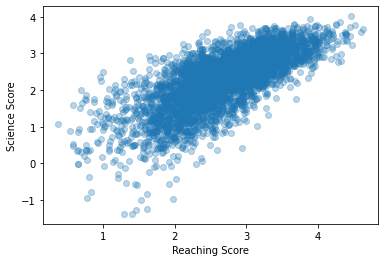

In [13]:
plt.scatter(x=education_data["reaching"],y=education_data["science"], alpha=0.3)
plt.xlabel('Reaching Score')
plt.ylabel('Science Score')
plt.show

Your answer: The scatter plot shows that there is a positive correlation between reaching score and science score. More specifically, a higher reaching score is associated with a higher science score.

---

## Problem 7 (6 pts)

Measure the strength of the association observed in the scatterplot from the previous problem by calculating and printing the **covariance** and (Pearson) **correlation** between the reaching and science scores. Use the [`.cov()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cov.html) and [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) pandas Series methods.

Create two new Series:
* `reaching_times_ten` = the reaching score column times 10,
* `science_times_ten` = the science score column times 10.

Calculate and print the covariance and correlation between these two new series and describe the effect of scaling the original data by 10 on the covariance and correlation.

---

In [14]:
covar=education_data["reaching"].cov(education_data["science"])
correlation=education_data["reaching"].corr(education_data["science"])
print("The covariation between reaching and science scores is {:.2f}".format(covar))
print("The correlation between reaching and science scores is {:.2f}".format(correlation))

The covariation between reaching and science scores is 0.35
The correlation between reaching and science scores is 0.73


In [15]:
reaching_times_ten= education_data["reaching"] * 10
science_times_ten=education_data["science"]* 10 

covar1=reaching_times_ten.cov(science_times_ten)
correlation1=reaching_times_ten.corr(science_times_ten)
print("The new covariance between reaching and sciences scores is {:.2f}".format(covar1))
print("The new correlation between reaching and sciences scores is {:.2f}".format(correlation1))

The new covariance between reaching and sciences scores is 34.77
The new correlation between reaching and sciences scores is 0.73


When we scaled the original data by 10, the covariance was also multiplied 100, while the correlation between the two variables remained unchanged, because the strength of the relationship between the two variables does not change.

---

## Problem 8 (6 pts)

Calculate and print the mean and standard deviation of the math and science scores. Save these values to Python variables.

Select the students whose **science score** is between its mean and one standard deviation above the mean. Calculate and print the mean and the standard deviation of the **math scores** for this subset of students.

For the math scores, how do the mean and standard deviation change when we go from looking at all students in the dataset to just those with a science score within one standard deviation above its mean? How does your observation relate to the correlation score between these two variables?

---

In [16]:
meanmath=education_data["math"].mean()
mathstd=education_data["math"].std()
meanscience=education_data["science"].mean()
sciencestd=education_data["science"].std()
print("The mean math score is {:.2f}".format(meanmath))
print("The standard deviation of the math scores is {:.2f}".format(mathstd))
print('\n')
print("The mean science score is {:.2f}".format(meanscience))
print("The standard deviation of the science scores is {:.2f}".format(sciencestd))




The mean math score is 3.16
The standard deviation of the math scores is 0.73


The mean science score is 2.29
The standard deviation of the science scores is 0.75


Your answer:

In [17]:
above_mean=meanscience+sciencestd
subset1=education_data["science"].between(meanscience,above_mean)
subset_for_math=education_data.math[subset1]
math_subset_mean= subset_for_math.mean()
math_subset_std= subset_for_math.std()

print("The mean math score for this subset is is {:.2f}".format(math_subset_mean))
print("The standard deviation of the math scores for this subset is is {:.2f}".format(math_subset_std))

The mean math score for this subset is is 3.42
The standard deviation of the math scores for this subset is is 0.49


In [18]:
correlation1=education_data["math"].corr(education_data["science"])
print("The correlation berween math and science scores is {:.2f}".format(correlation1))


The correlation bertween math and science scores is 0.71


By subsetting the data such that we only include the students whose science scores are one standard deviation above the mean, the mean math scores have increased  from 3.16 to 3.42. The standard deviation decreased from 0.73 to 0.49. The correlation between these two variables is 0.71, suggesting a moderately strong correlation between the two variables. It therefore makes sense that when we looked at students whose science scores were higher than the average,  the corresponding math scores would also be higher and that the spread from the mean would be lower.

---

## Problem 9 (9 pts)

Group the data by school (indicated in the ID column `'S7_ID'`) and calculate the mean math and reaching scores for each school. Subset the data, keeping only school whose average math *and* reaching scores are both strictly greater than 2. Save this dataframe as a variable called `school_mean_subset`. Print the number of rows in `school_mean_subset`.

**Hint:** When subsetting the mean reaching and reaching scores by school to satisfy two  conditions, there are [several ways to accomplish this task](https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/). Pick your favorite. And [`.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) is a method you may need if you want to reset the index column of a groupby result.

**Confidence check:** You should have 911 schools whose math and reaching scores are both  strictly greater than 2.

Calculate and print the standard (Pearson) correlation and the rank (Spearman) correlation between the math and science scores in the subset data. The [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) computes the Pearson correlation by default, but you can get the Sperman correlation by explicitly specifying the `method` parameter (check the docs).

Make a scatterplot with the average math scores on the x-axis, and the average reaching scores on the y-axis. Discuss any patterns you see in the scatterplot, and connect your observations to the two correlation scores.

---

In [19]:
grouped_school=education_data.groupby("S7_ID").mean()
school_mean_subset=grouped_school.loc[(grouped_school['reaching']>2) & (grouped_school['math']>2)]
print(school_mean_subset.shape[0])
type(education_data.groupby("S7_ID"))

911


pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
pearsons=school_mean_subset["reaching"].corr(school_mean_subset["math"])
print("The Pearson correlation between reaching and math scores in the subset data is {:.2f}".format(pearsons))

spearmans=school_mean_subset["reaching"].corr(school_mean_subset["math"], method='spearman')
print("The Spearman correlation between reaching and math scores in the subset data is {:.2f}".format(spearmans))



The Pearson correlation between reaching and math scores in the subset data is 0.68
The Spearman correlation between reaching and math scores in the subset data is 0.69


<function matplotlib.pyplot.show(*args, **kw)>

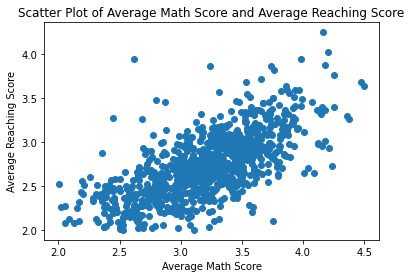

In [45]:
plt.scatter(x=school_mean_subset["math"],y=school_mean_subset["reaching"])
plt.xlabel('Average Math Score')
plt.ylabel('Average Reaching Score')
plt.title('Scatter Plot of Average Math Score and Average Reaching Score')
plt.show

From the scatter plot, there appears to be a moderately strong relationship between math and reaching score. In other words, a higher math score is correlated with a higher reaching score.

---

## Problem 10 (8 pts)

Use the [`.rank()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) Series method to add columns called `'math_rank'` and `'reaching_rank'` to `school_mean_subset`; these columns should contain the rank of the average math and reaching scores (by school), respectively. Print the first few rows of these new columns.

**Confidence check:** For the school with `S7_ID==1022`, the mean math score rank is 859 and the mean reaching score rank is 809.

Calculate the Pearson and Spearman correlation between the two rank variables and make a scatterplot with `math_rank` on the x-axis and `reaching_rank` on the y-axis.

Compare the correlations computed in this problem with those computed in the previous problem.

---

In [22]:
subset_school=school_mean_subset.copy()
math_rank=subset_school['math'].rank()
reaching_rank=subset_school['reaching'].rank()
subset_school['math_rank']=math_rank
subset_school['reaching_rank']=reaching_rank
school_mean_subset=subset_school
print(school_mean_subset.head())

            CHILDID  X_CHSEX_R       X7AGE  X7GRDLVL  X7PUBPRI  X_RACETH_R  \
S7_ID                                                                        
1002   1.000654e+07   1.333333  108.341667  1.000000       1.0    2.166667   
1003   1.000577e+07   1.833333  106.690000  1.166667       1.0    2.333333   
1006   1.000489e+07   1.333333  106.751667  1.000000       1.0    3.000000   
1012   1.000723e+07   1.500000  104.285000  1.000000       2.0    2.000000   
1013   1.000499e+07   1.363636  111.102727  1.000000       1.0    2.000000   

       CBEHAVE_POS  CBEHAVE_NEG  PEERVIC_T  PEERAGG_T  ...  X7TCHINT  \
S7_ID                                                  ...             
1002      3.466667     2.354167   1.083333   1.083333  ...  1.416667   
1003      3.633333     2.166667   1.375000   1.083333  ...  1.666667   
1006      3.866667     2.083333   1.458333   1.250000  ...  1.583333   
1012      3.100000     3.187500   2.250000   2.250000  ...  1.625000   
1013      3.690909   

<function matplotlib.pyplot.show(*args, **kw)>

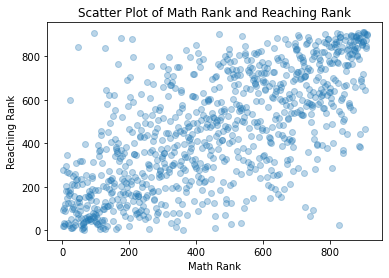

In [48]:
plt.scatter(x=math_rank,y=reaching_rank, alpha=0.3)
plt.xlabel('Math Rank')
plt.ylabel('Reaching Rank')
plt.title('Scatter Plot of Math Rank and Reaching Rank')
plt.show

In [24]:
spearman2=reaching_rank.corr(math_rank, method='spearman')
print("The spearman correlation between the reaching rank and the math rank is is {:.2f}".format(spearman2))
pearson2=reaching_rank.corr(math_rank, method='pearson')
print("The pearson correlation between the reaching rank and the math rank is is {:.2f}".format(pearson2))

The spearman correlation between the reaching rank and the math rank is is 0.69
The pearson correlation between the reaching rank and the math rank is is 0.69


Both the spearman and the pearson correlation values computed for the ranked reaching and math scores are very similar to the correlations computed in the previous problem. The pearsons correlation increased by an insignificant amount, and the spearmans correlation remained the same.

---

## Problem 11 (8 pts) 

`PARENTINV` represents whether or not parents attend school events. Calucate the mean score of math,science,reaching score,then compare the difference between scores according the `PARENTINV`. Make a boxplot with the average scores on the y-axis, and the `PARENTINV`  on the x-axis. Discuss any patterns you see in the boxplot.

[A **t-test** is a statistical test that is used to compare the means of two groups](https://www.statisticshowto.com/probability-and-statistics/t-test/). The t test tells you how **significant** the differences between groups are. It has been used widely in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. Every t-value has a **p-value** to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. **Low p-values are good**; They indicate your data did not occur by chance. Now we perform the math score for parent event that is above 3 and below 3. Explain your result.

---


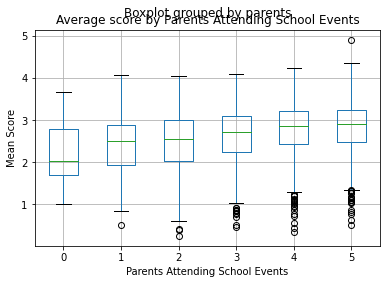

In [42]:
education_data['mean_score']=education_data[['math', 'science', 'reaching']].mean(axis=1)
plot=education_data.boxplot('mean_score', by='parents')
plt.xlabel('Parents Attending School Events')
plt.ylabel('Mean Score')
plt.title('Average score by Parents Attending School Events')

display(plot)

From the boxplot, we can see a trend where a higher PARENTINV score is associated with a higher mean score. Another trend we can also see is that as the PARENTINV score increases, the number of outliers also increases.

In [49]:
parent_subset1=education_data.loc[(education_data['parents']>=3)]
parent_subset2=education_data.loc[(education_data['parents']<3)]


print(stats.ttest_ind(parent_subset1['math'], parent_subset2['math']))



Ttest_indResult(statistic=11.162581950253115, pvalue=1.4545621449521393e-28)


The null hypothesis for this test is that there is no significant difference between the mean math score for parent event that is above 3 and parent event that is below 3.The alternative hypothesis is that there is a significant difference between the math scores.
The p value for this T-Test is 1.45e-28. This is a very low P value, which suggests that our data did not occur by chance and there is enough evidence to reject the null hypothesis. I can therefore conclude that there is a significant difference between the math scores of student's parents who attend 3 or more school events, and the math scores of students whose parents attend less than 3 school events.